In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Done by 
#iit2018115 (Shubham Kumar)
#iit2018125 (Raktim Bijoypuri)
#iit2018126 (Aditya Kamble)
#iit2018128 (Aakashdeep)
#iit2018135 (Tejas Mane)

In [ ]:
import pandas as pd
train_data = pd.read_csv("/content/trainData_final.csv",sep='^',index_col=[0])
train_data.head()
som_data = train_data[train_data['label']=='person'][:500].copy(deep=True)
train_data = train_data[train_data['label']!='person']
train_data = train_data.append(som_data)

test_data = pd.read_csv("/content/testData.csv",sep='^',index_col=[0])
som_data = test_data[test_data['label']=='person'][:500].copy(deep=True)
test_data = test_data[test_data['label']!='person']
test_data = test_data.append(som_data)


In [ ]:
train_data = train_data.sample(frac =1)
test_data = test_data.sample(frac =1)
len(train_data)

7558

In [ ]:
import cv2
from tqdm import tqdm
import numpy as np
train_x = []
for row in tqdm(train_data.iterrows(),position=0,leave=True):
  # print(row[1]['name'])
  train_x.append(cv2.resize(cv2.imread("/content/archive/VOC2012/JPEGImages/"+row[1]['filename']+".jpg"),(100,100)))
  # print(train_x)

7558it [00:42, 179.73it/s]


In [ ]:
import cv2
from tqdm import tqdm
import numpy as np
test_x = []
for row in tqdm(test_data.iterrows(),position=0,leave=True):
  # print(row[1]['name'])
  test_x.append(cv2.resize(cv2.imread("/content/archive/VOC2012/JPEGImages/"+row[1]['filename']+".jpg"),(100,100)))
  # print(train_x)

7580it [00:41, 180.62it/s]


In [ ]:
train_x = np.array(train_x).reshape(len(train_data),30000)
test_x = np.array(test_x).reshape(len(test_data),30000)

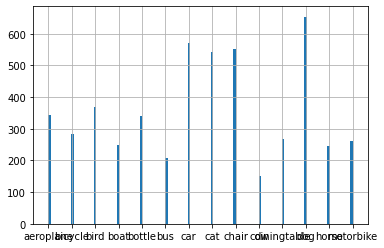

In [ ]:
test_dataf['label'].hist(bins=120)

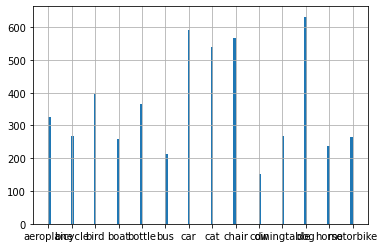

In [ ]:
traindataf['label'].hist(bins=120)

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
a,b = train_x.shape
train_x = train_x.reshape((a,100,100,3))
model = VGG16(weights='imagenet', include_top=False,input_shape=(100,100,3))


x = preprocess_input(train_x)

features_y = model.predict(x)
train_data_cnn = features_y


58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
a,b = test_dataf_cop.shape
test_dataf_cop = test_dataf_cop.reshape((a,100,100,3))
model = VGG16(weights='imagenet', include_top=False,input_shape=(100,100,3))


x = preprocess_input(test_dataf_cop)

features_y = model.predict(x)
test_data_cnn = features_y


In [ ]:
train_data_cnn = train_data_cnn.reshape(len(train_data_cnn),512*9)
traindataf = pd.DataFrame(train_data_cnn,columns = np.arange(1,train_data_cnn.shape[1]+1))
traindataf['label'] = train_data['label'][:len(train_data_cnn)].reset_index(drop=True)

In [ ]:
test_data_cnn = test_data_cnn.reshape(len(test_data_cnn),512*9)
test_dataf = pd.DataFrame(test_data_cnn,columns = np.arange(1,test_data_cnn.shape[1]+1))
test_dataf['label'] = test_data['label'][:len(test_data_cnn)].reset_index(drop=True)

In [ ]:
def label_data(label):
  labels = np.array(traindataf['label'].unique())
  df = []
  for l in labels:
    if(l==label):
      df.append(traindataf[traindataf['label']==l])
    else:
      df.append(traindataf[traindataf['label']==l].sample(frac=0.04))
  return pd.concat(df)

In [ ]:
import numpy as np
from sklearn.ensemble import IsolationForest
OCtree_for_label = {}
int_to_letter = {}
for i,l in enumerate(np.array(traindataf['label'].unique())):
  int_to_letter[i]=l
  data_label = label_data(l)
  clf = IsolationForest().fit(data_label.drop('label',axis=1))
  OCtree_for_label[l]=clf

In [ ]:
predictions = []
for let in OCtree_for_label:
  predictions.append(OCtree_for_label[let].decision_function(test_dataf.drop('label',axis=1)))

In [ ]:
predictions = np.array(predictions).T

In [ ]:
ans = []
for i,pred in enumerate(predictions):
  ans.append(int_to_letter[pred.argmax()])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_dataf['label'], ans))

              precision    recall  f1-score   support

   aeroplane       0.31      0.20      0.24        51
     bicycle       0.00      0.00      0.00        32
        bird       0.26      0.17      0.21        46
        boat       0.09      0.07      0.08        30
      bottle       0.07      0.02      0.03        47
         bus       0.17      0.29      0.22        35
         car       0.28      0.24      0.26        79
         cat       0.20      0.19      0.19        69
       chair       0.02      0.01      0.02        74
         cow       0.09      0.29      0.13        17
 diningtable       0.07      0.09      0.08        45
         dog       0.23      0.31      0.26        78
       horse       0.08      0.31      0.13        35
   motorbike       0.10      0.23      0.14        39
      person       0.10      0.02      0.03       212
 pottedplant       0.08      0.07      0.07        29
       sheep       0.06      0.12      0.08        16
        sofa       0.03    